# Silhoutte Score

$$S=\frac{b(v)-a(v)}{max(a,b)}$$

donde:

+ v:= vector de datos
+ a(v):=distancia media desde v al resto de vectores del mismo cluster
+ b(v):=distancia media desde v a los vectores del cluster más cercano


S pertenece al intervalo [-1,1], de tal manera que:

+ S=1  => buena clusterizacion
+ S=0  => overlapping
+ S=-1 => mala clusterizacion

In [1]:
from sklearn import cluster, datasets

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

import numpy as np

In [62]:
x, y = datasets.make_moons(n_samples = 1500, noise = 0.05)

In [63]:
x = StandardScaler().fit_transform(x)

In [64]:
x

array([[-0.20983069, -0.78966307],
       [-0.61063502, -0.06398902],
       [-1.62945144,  0.51507736],
       ...,
       [ 1.67154594, -0.08270621],
       [-1.61049128,  0.36838042],
       [ 1.69559375, -0.36071521]])

In [20]:
help(cluster.AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster._agglomerative:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)
 |  
 |  Agglomerative Clustering
 |  
 |  Recursively merges the pair of clusters that minimally increases
 |  a given linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or "precomputed".
 |      If linkage is "ward", only "euclidean" is accepted.
 |      If "precomputed", a dis

In [87]:
single = cluster.AgglomerativeClustering(n_clusters = 2, linkage = 'single')

In [88]:
single.fit(x)

AgglomerativeClustering(linkage='single')

In [89]:
y1_pred = single.labels_

In [90]:
set(y1_pred)

{0, 1}

In [91]:
kmeans = cluster.KMeans(n_clusters = 2)
kmeans.fit(x)

y2_pred= kmeans.predict(x)

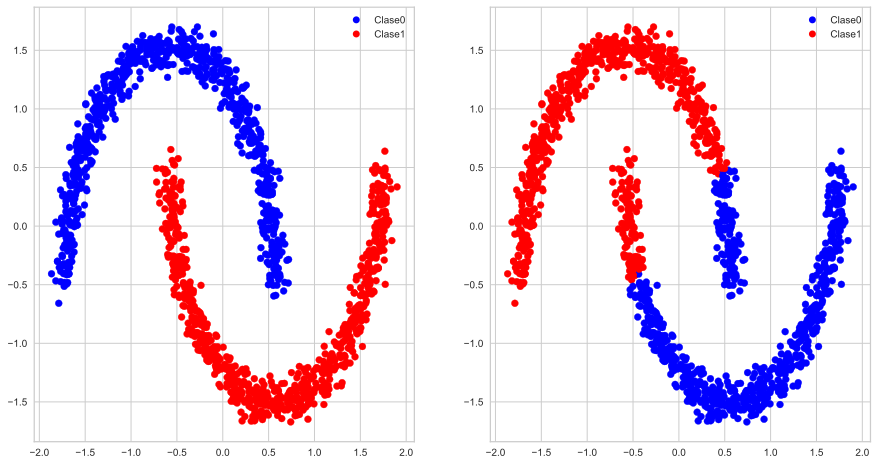

In [92]:
fig, ax = plt.subplots(1,2, figsize = (15,8))

colors = np.array(['blue','red'])


legend_e = [Line2D([0],[0], color = c, marker ='o', linestyle = '', label = f'Clase{i}') for i,c in enumerate(colors)]

ax[0].scatter(x[:,0], x[:,1],  color = colors[y1_pred])
ax[0].legend(handles = legend_e, loc = 'upper right')

ax[1].scatter(x[:,0], x[:,1],  color = colors[y2_pred])
ax[1].legend(handles = legend_e, loc = 'upper right')

In [44]:
from sklearn.metrics import silhouette_score

In [78]:
print(f'modelo jerarquico : silhouette_score {silhouette_score(x, y1_pred)}')

print(f'modelo kmeans : silhouette_score {silhouette_score(x, y2_pred)}')

modelo jerarquico : silhouette_score 0.0014555689141912374
modelo kmeans : silhouette_score 0.449213409850307


# Elbow

**nº óptimo de clusters**


![](data/elbow.png)

$$WSS=Inercia=\sum_{i=0}^{n} min(|x_i - \bar{x}|^{2})$$

In [47]:
from IPython.display import set_matplotlib_formats
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
set_matplotlib_formats('svg')

In [48]:
x, y = datasets.make_blobs(n_features= 3, centers = 2) #Datos sinteticos, con 3 caracteristicas y 2 centros

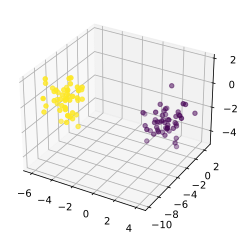

In [49]:
fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x[:,0], x[:,1],x[:,2], c = y)

In [51]:
n_clusters, inercia = zip(*[(k, cluster.KMeans(n_clusters = k ).fit(x).inertia_) for k in range(1, 10)])

In [52]:
print(n_clusters,inercia)

(1, 2, 3, 4, 5, 6, 7, 8, 9) (2653.65333020215, 260.91908335540603, 220.9123237933368, 187.05379665866445, 167.82208208180995, 145.46879421656985, 126.93217305030898, 111.45802182210424, 106.55288302913472)


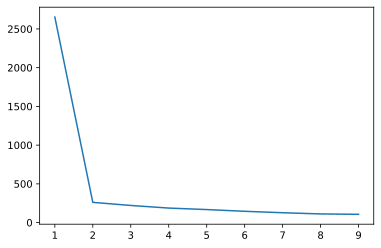

In [54]:
fig = plt.figure()


ax = fig.add_subplot()
ax.plot(n_clusters, inercia)

In [56]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


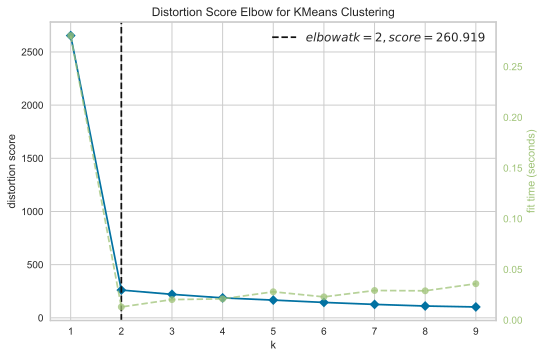

In [57]:
modelo =cluster.KMeans()

visual = KElbowVisualizer(modelo, k = (1,10))

visual.fit(x)

visual.poof();

In [59]:
x, y = datasets.make_moons(n_samples = 1500, noise = 0.03)
X=StandardScaler().fit_transform(x)

inercias=[]

for i in range(1, 10):
    kmeans=cluster.KMeans(n_clusters=i).fit(x)
    inercias.append(kmeans.inertia_)

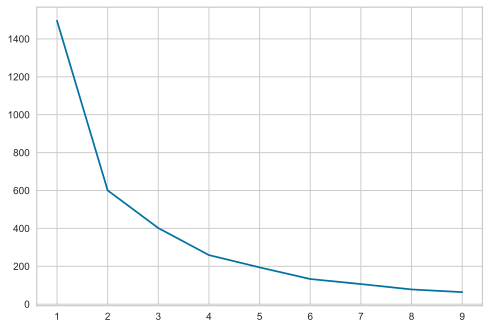

In [60]:
plt.plot(range(1,10), inercias);

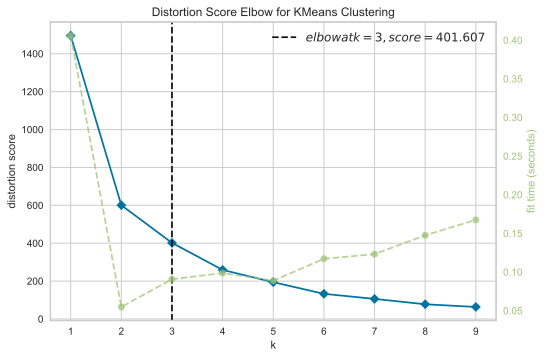

In [61]:
modelo =cluster.KMeans()

visual = KElbowVisualizer(modelo, k = (1,10))

visual.fit(x)

visual.poof();

In [65]:
# probando lunas con la informacion de k-elbow de 3 clusters con el modelo k-means

In [66]:
kmeans = cluster.KMeans(n_clusters = 3)
kmeans.fit(x)

y2_pred= kmeans.predict(x)

In [72]:
set(y2_pred)

{0, 1, 2}

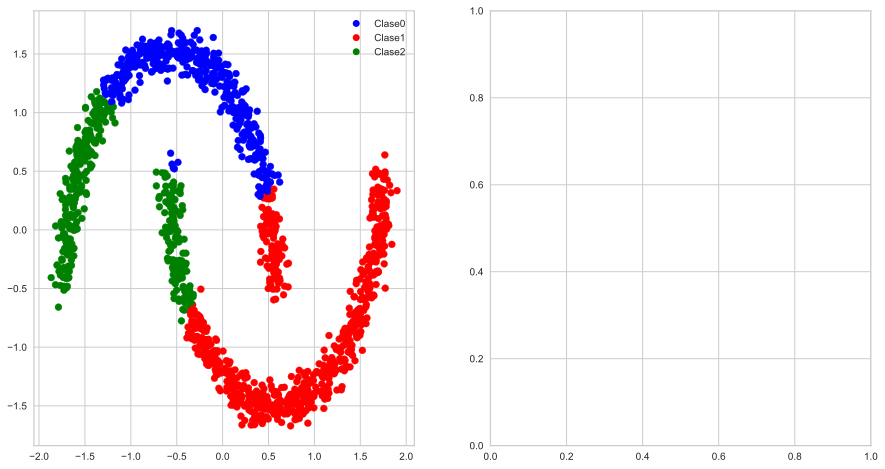

In [77]:
fig, ax = plt.subplots(1,2, figsize = (15,8))

colors = np.array(['blue','red', 'green'])


legend_e = [Line2D([0],[0], color = c, marker ='o', linestyle = '', label = f'Clase{i}') for i,c in enumerate(colors)]

ax[0].scatter(x[:,0], x[:,1],  color = colors[y2_pred])
ax[0].legend(handles = legend_e, loc = 'upper right')

In [79]:
print(f'modelo kmeans : silhouette_score {silhouette_score(x, y2_pred)}')

modelo kmeans : silhouette_score 0.449213409850307


In [80]:
single = cluster.AgglomerativeClustering(n_clusters = 3, linkage = 'single')

single.fit(x)

y1_pred = single.labels_

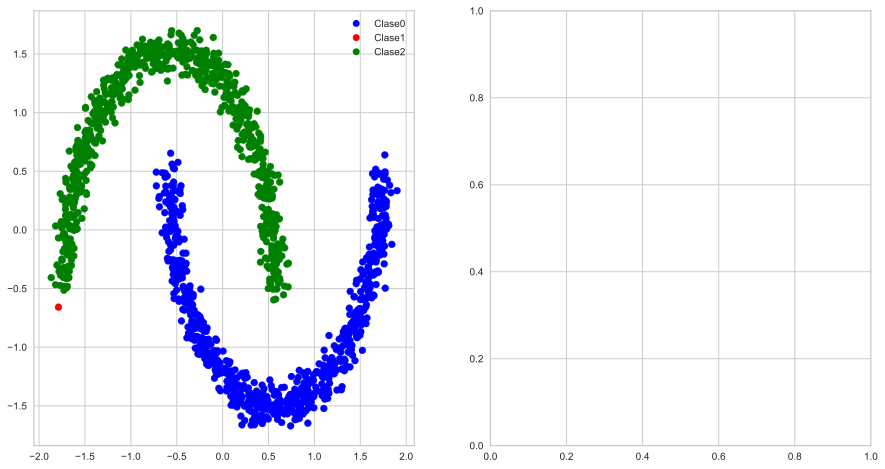

In [81]:
fig, ax = plt.subplots(1,2, figsize = (15,8))

colors = np.array(['blue','red', 'green'])


legend_e = [Line2D([0],[0], color = c, marker ='o', linestyle = '', label = f'Clase{i}') for i,c in enumerate(colors)]

ax[0].scatter(x[:,0], x[:,1],  color = colors[y1_pred])
ax[0].legend(handles = legend_e, loc = 'upper right')

# RandScore


In [82]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)
X=StandardScaler().fit_transform(X)

In [83]:
single=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
single.fit(X)

y1_pred=single.labels_

In [84]:
kmeans=cluster.KMeans(n_clusters=2)
kmeans.fit(X)

y2_pred=kmeans.predict(X)

In [85]:
from sklearn.metrics import adjusted_rand_score as ars

In [86]:
print(ars(y,y1_pred)) #jeraquico agloremativo

print(ars(y,y2_pred)) #kmeans

1.0
0.4915292595222628
